In [60]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="ticks")

# Building structured multi-plot grids
다차원 데이터를 탐색할 때 유용한 접근 방식은 데이터 집합의 서로 다른 하위 집합에 동일한 플롯의 여러 인스턴스를 그리는 것입니다.  
이 기법을 '격자(lattice)' 또는 '격자(trellis)' 플로팅이라고도 하며, '작은 배수(small multiples)'라는 개념과 관련이 있습니다.  
이를 통해 뷰어는 복잡한 데이터 집합에 대한 많은 양의 정보를 빠르게 추출할 수 있습니다.  

Matplotlib은 여러 축을 가진 그림을 만드는 데 탁월한 지원을 제공하며, seaborn은 이를 기반으로 플롯의 구조를 데이터 집합의 구조에 직접 연결합니다.

figure level 함수는 아래에서 설명할 객체 위에 구축됩니다. 대부분의 경우 이러한 함수를 사용하여 작업하고 싶을 것입니다.  
이러한 함수는 각 그리드의 여러 플롯을 동기화하는 몇 가지 중요한 부기 작업을 처리합니다.  
이 장에서는 고급 응용 프로그램에 유용할 수 있는 기본 개체의 작동 방식을 설명합니다.

## Conditional small multiples
FacetGrid 클래스는 데이터 집합의 하위 집합 내에서 변수의 분포 또는 여러 변수 간의 관계를 개별적으로 시각화하려는 경우에 유용합니다.  
패싯그리드는 행(row), 열(col), 색조(hue) 등 최대 세 가지 차원으로 그릴 수 있습니다.  
행과 열은 결과 축 배열과 명확하게 대응하며, 색조 변수는 깊이 축을 따라 서로 다른 레벨이 서로 다른 색상으로 그려지는 세 번째 차원으로 생각하면 됩니다.

relplot(), displot(), catplot(), lmplot() 각각은 내부적으로 이 객체를 사용하며, 작업이 완료되면 객체를 반환하여 추가 조정에 사용할 수 있도록 합니다.  

이 클래스는 데이터 프레임과 그리드의 행, 열 또는 색조 차원을 형성할 변수 이름으로 FacetGrid 객체를 초기화하여 사용됩니다.  
이러한 변수는 범주형 또는 불연속형이어야 하며, 변수의 각 레벨에 있는 데이터는 해당 축을 따라 패싯에 사용됩니다.  
예를 들어 팁 데이터 집합에서 점심과 저녁의 차이를 조사하고 싶다고 가정해 보겠습니다:

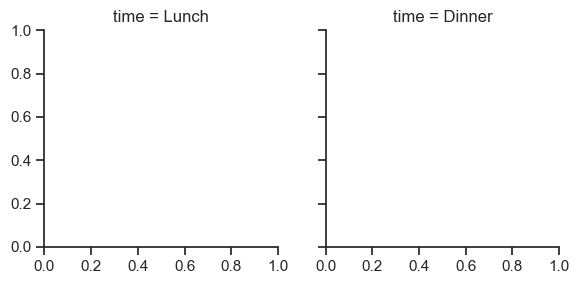

In [15]:
# matplotlib 그림과 축을 설정한 초기화된 그리드

tips = sns.load_dataset("tips")
g = sns.FacetGrid(tips, col="time")

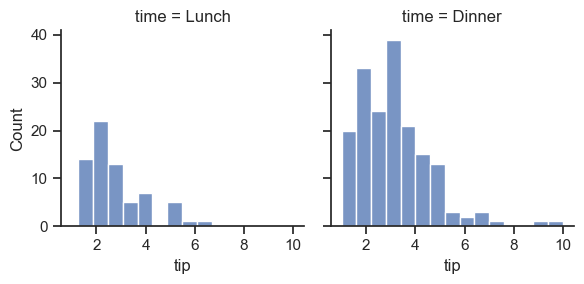

In [16]:
# FacetGrid.map() 메서드를 사용한 시각화
# 플로팅 함수(histplot)와, 데이터 변수명(tip) 입력

g = sns.FacetGrid(tips, col="time")
g.map(sns.histplot, "tip")

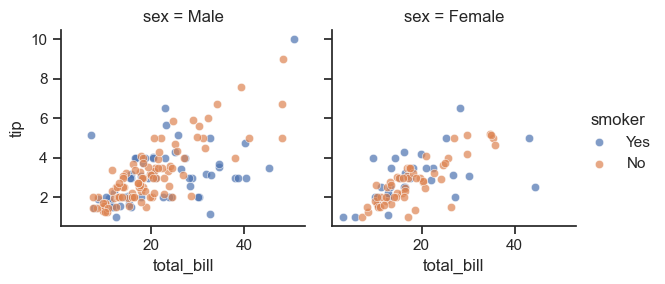

In [17]:
# 그래프 + 축에 주석 추가
# 관계형 플롯을 만들려면 여러 변수 이름과 키워드 전달
g = sns.FacetGrid(tips, col="sex", hue="smoker")
g.map(sns.scatterplot, "total_bill", "tip", alpha=.7)
g.add_legend()

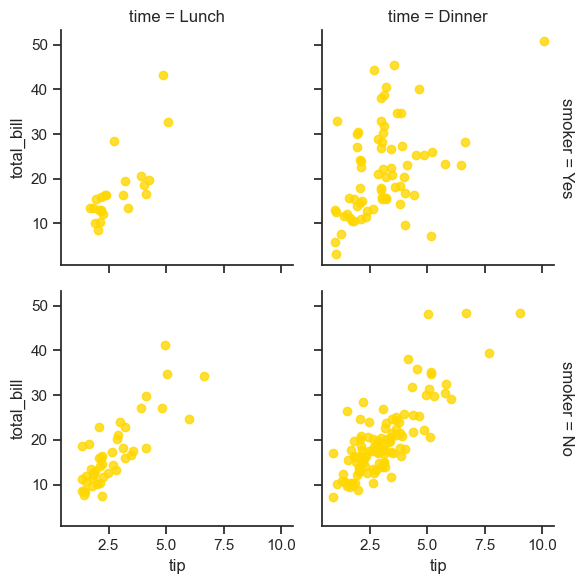

In [32]:
# 그리드 제어 옵션
# margin_titles는 matplotlib API에서 공식적으로 지원되지 않으며 모든 경우에 제대로 작동하지 않을 수 있으며 특히, 현재 플롯 외부에 있는 범례에는 사용할 수 없습니다.

g = sns.FacetGrid(tips, row="smoker", col="time", margin_titles=True)
g.map(sns.regplot, "tip", "total_bill", color="gold", fit_reg = False, x_jitter=.2)

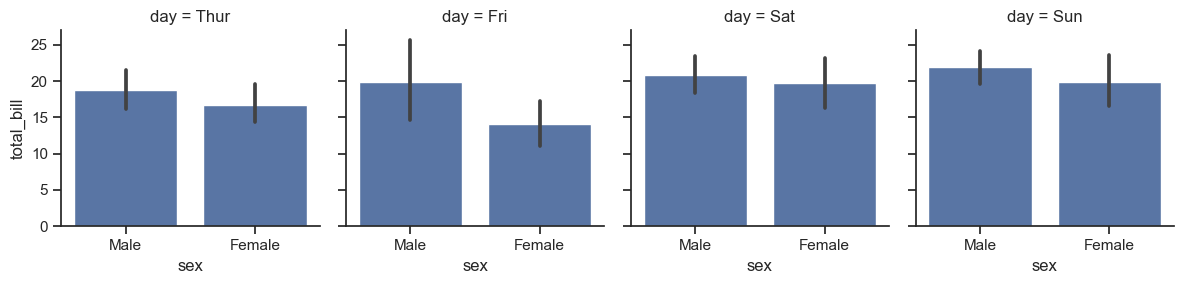

In [37]:
# 그래프 크기는 가로 세로 비율과 함께 각 패싯의 높이 입력

g = sns.FacetGrid(tips, col="day", height=3, aspect=1)
g.map(sns.barplot, "sex", "total_bill", order=["Male", "Female"])

CategoricalIndex(['Sat', 'Sun', 'Thur', 'Fri'], categories=['Thur', 'Fri', 'Sat', 'Sun'], ordered=False, dtype='category')


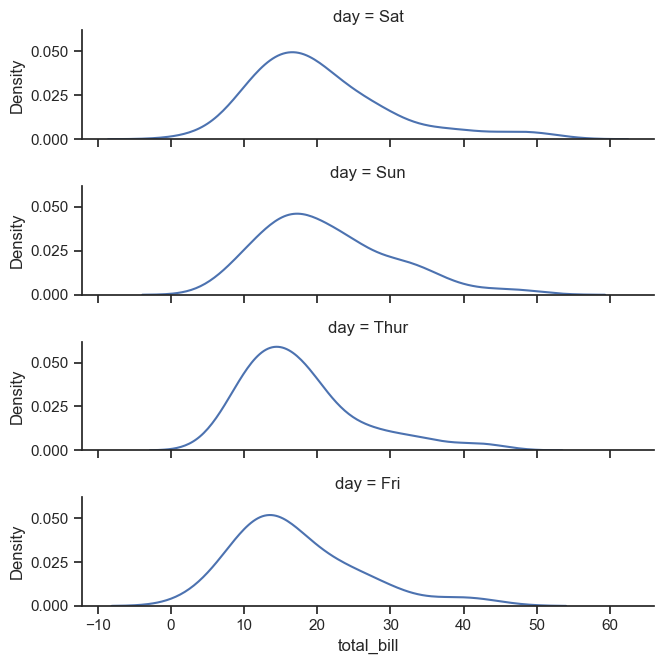

In [41]:
# 패싯의 기본 순서는 데이터프레임의 정보에서 파생됩니다. 
# 패싯을 정의하는 데 사용되는 변수에 범주형 유형이 있는 경우 범주의 순서가 사용됩니다. 
# 그렇지 않으면 패싯은 범주 수준이 나타나는 순서대로 표시됩니다. 
# 그러나 적절한 *_order 매개 변수를 사용하여 패싯 차원의 순서를 지정할 수 있습니다:

ordered_days = tips.day.value_counts().index
print(ordered_days)
g = sns.FacetGrid(tips, row="day", row_order=ordered_days,
                  height=1.7, aspect=4,)
g.map(sns.kdeplot, "total_bill")


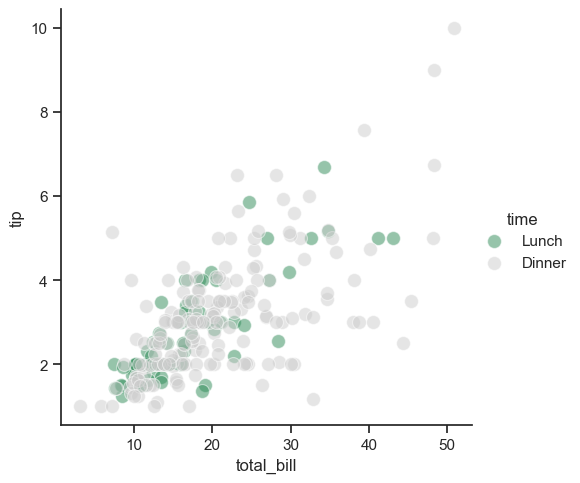

In [44]:
# 모든 색 팔레트(즉, color_palette()에 전달할 수 있는 것) 제공 가능
# 색조(hue)에 전달하는 색 팔레트를 딕셔너리로 커스텀 매핑해 사용할 수도 있음:

pal = dict(Lunch="seagreen", Dinner=".8")
g = sns.FacetGrid(tips, hue="time", palette=pal, height=5)
g.map(sns.scatterplot, "total_bill", "tip", s=100, alpha=.5)
g.add_legend()

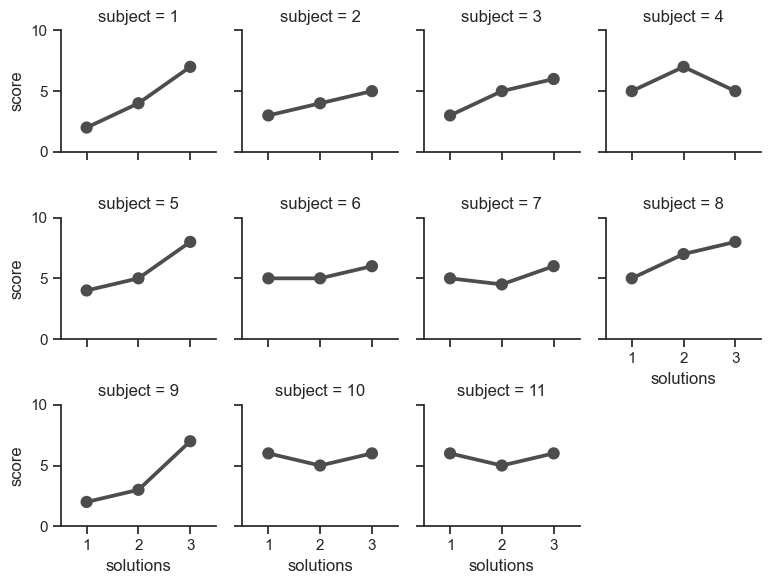

In [48]:
# 한 변수에 여러 레벨이 있는 경우 열을 따라 플롯하되 여러 행에 걸쳐 있도록 '래핑' 가능
# 이 경우 행(row) 변수는 사용 불가

attend = sns.load_dataset("attention").query("subject <= 11")
g = sns.FacetGrid(attend, col="subject", col_wrap=4, height=2, ylim=(0, 10))
g.map(sns.pointplot, "solutions", "score", order=[1, 2, 3], color=".3", errorbar=None)

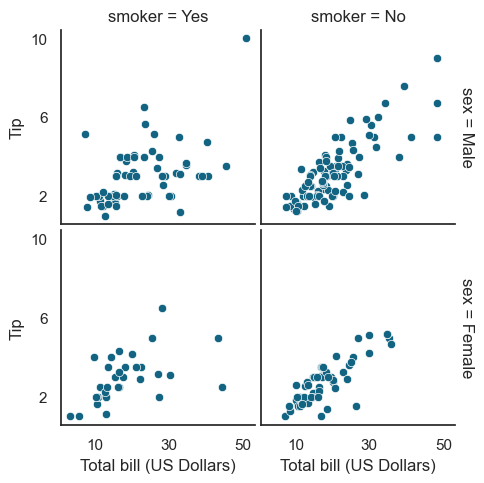

In [58]:
# FacetGrid.map()을 여러번 사용하여 플롯을 그린 후에는 플롯의 일부만 조정하고 싶을 수 있습니다.
# 더 높은 추상화 수준에서 그림을 조작하기 위한 여러 가지 메서드도 FacetGrid 객체에 있습니다. 
# 가장 일반적인 메서드는 FacetGrid.set()이며, 내부 패싯에 축 레이블이 없다는 점을 고려한 FacetGrid.set_axis_labels()와 같은 좀 더 특수한 메서드도 있습니다.

with sns.axes_style("white"):
    g = sns.FacetGrid(tips, row="sex", col="smoker", margin_titles=True, height=2.5)
g.map(sns.scatterplot, "total_bill", "tip", color="#126482")
g.set_axis_labels("Total bill (US Dollars)", "Tip")
g.set(xticks=[10, 30, 50], yticks=[2, 6, 10])
g.figure.subplots_adjust(wspace=.03, hspace=.03) # 플롯 간격

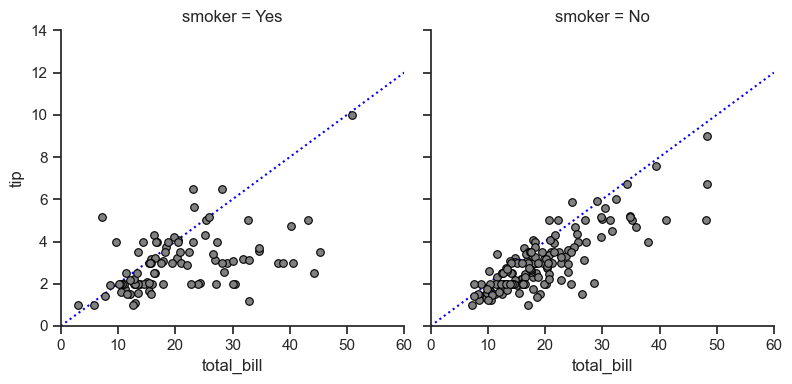

In [76]:
# + 각각 figure 및 axes_dict에 멤버 속성으로 저장되어 있는 matplotlib Figure 및 Axes 객체를 사용하여 직접 커스텀 가능
# 행이나 열 패싯이 없는 그림을 만들 때 ax 속성을 사용하여 단일 축에 직접 액세스할 수도 있습니다.

g = sns.FacetGrid(tips, col="smoker", margin_titles=True, height=4)
g.map(plt.scatter, "total_bill", "tip", color="gray", edgecolor="black", s=30, lw=0.8)
for ax in g.axes_dict.values():
    ax.axline((0, 0), slope=.2, c="blue", ls=":", zorder=0)
g.set(xlim=(0, 60), ylim=(0, 14))